# Analysis of Dynamic Systems

## Curves and graphical representations

- Poles and zeros map.
- Step response.
- Nyquist diagram.
- Bode diagrams.
- Root locus plot.
- Data plot.

In [30]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [0]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

### Poles and zeros map

**Example:** Consider the function $F_1(s)$:

$$F_1\left ( s \right ) = \frac{5}{s\left ( s^2 + s + 2 \right )}$$

The poles of $F_1(s)$ are:

In [4]:
import sympy
from sympy import *

sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

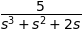

In [5]:
F1 = (5)/(s*(s**2+s+2))
F1.expand()

In [7]:
# Run this only in Colab
!pip install control

     |████████████████████████████████| 256kB 2.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=29fe134bd56fa99dfbf2a8f2966e5b4639655f8b76394a7ddf1bc7a9044cbc78
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [8]:
from control import *
from scipy import signal

sysF1 = signal.lti([5], [1, 1, 2, 0]) # F1(s) = (5) / (s ** 3 + s ** 2 + 2 * s + 0)
w, H = signal.freqresp(sysF1)
print(sysF1.zeros, sysF1.poles)

(array([], dtype=float64), array([-0.5+1.32287566j, -0.5-1.32287566j,  0. +0.j        ]))


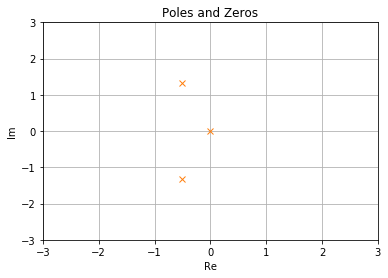

In [9]:
from matplotlib import pyplot as plt
plt.plot(sysF1.zeros.real, sysF1.zeros.imag, 'o')
plt.plot(sysF1.poles.real, sysF1.poles.imag, 'x')
plt.title('Poles and Zeros')
plt.xlabel('Re')
plt.ylabel('Im')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()
plt.show()

### Step response

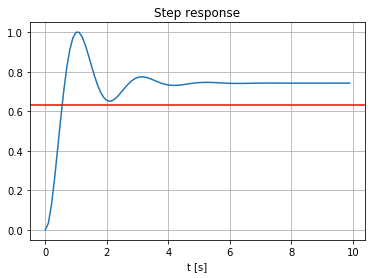

In [10]:
from numpy import *
from matplotlib import pyplot as plt
from scipy import signal

t_eje = 10   # Tiempo total del eje de tiempo
h_times = arange(0.0, t_eje, 0.1)

sysF2 = signal.lti([5], [1, 2, 10]) # F1(s) = (5) / (s ** 2 + 2 * s + 10)
step_response = sysF2.step(T=h_times)[1]
plt.plot(h_times, step_response/step_response.max())    # Normalizada al pico
plt.axhline(0.63, color='red')
plt.xlabel('t [s]')
plt.title('Step response')
plt.grid()
plt.show()

### Nyquist plot

A Nyquist plot is a parametric plot of a frequency response. The most common use of Nyquist plots is for assessing the stability of a system with feedback. In Cartesian coordinates, the real part of the transfer function is plotted on the X axis.

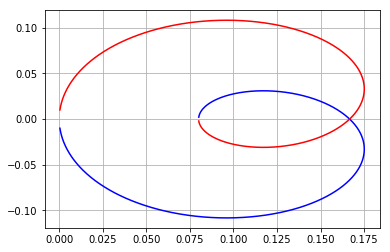

In [11]:
from scipy import signal
import matplotlib.pyplot as plt

sysF3 = signal.lti([1, 2], [1, 6, 25]) # H(s) = (s + 2) / (s ** 2 + 6 * s + 25)
#sysF3 = signal.ZerosPolesGain([], [1, 1, 1], [5]) # H(s) = 5 / (s-1)^3
w, H = signal.freqresp(sysF3)
plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.grid()
plt.show()

### Bode diagrams

#### Example:

Draw the Bode plot for:

$$G\left(s\right)=\frac{10\left(s+10\right)}{s\left(s+2\right)\left(s+5\right)}$$

#### Solution

First, we re-write the equation in canonical form:

$$G\left(s\right)=\frac{10\left(s+10\right)\frac{10}{10}}{s\left(s+2\right)\frac{2}{2}\left(s+5\right)\frac{5}{5}}$$

$$G\left(s\right)=\frac{10\left(\frac{s}{10}+1\right)10}{s\left(\frac{s}{2}+1\right)2\left(\frac{s}{5}+1\right)5}$$

$$G\left(s\right)=\frac{100\left(1+\frac{s}{10}\right)}{s\left(1+\frac{s}{2}\right)\left(1+\frac{s}{5}\right)10}=\frac{10\left(1+\frac{s}{10}\right)}{s\left(1+\frac{s}{2}\right)\left(1+\frac{s}{5}\right)}
$$

The equation has five terms: gain, one zero and three poles. We must plot these five curves and add them together.

$$L_{m}\,K=L_{m}\,10=20\:log\,10=20\;\left[\textrm{dB}\right]$$

And the graph is:

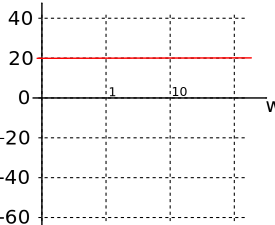

In [15]:
from IPython.display import SVG
SVG(valid_path + 'bodef11.svg')

The cutoff frequency of the zero is 10, therefore, the graph is:

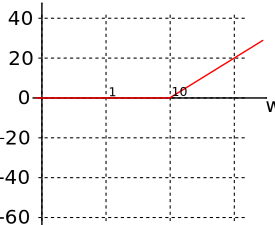

In [16]:
SVG(valid_path + 'bodef12.svg')

The cutoff frequency of the first pole is 0, therefore, the graph is:

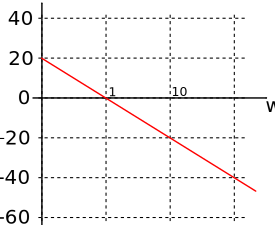

In [17]:
SVG(valid_path + 'bodef13.svg')

The cutoff frequency of the second pole is 2, therefore, the graph is:

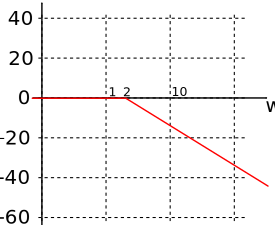

In [18]:
SVG(valid_path + 'bodef14.svg')

The cutoff frequency of the third pole is 5, therefore, the graph is:

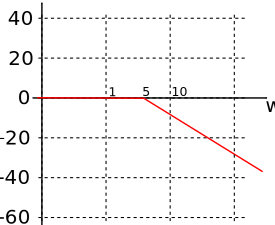

In [19]:
SVG(valid_path + 'bodef15.svg')

The five asymptotes in a single graph:

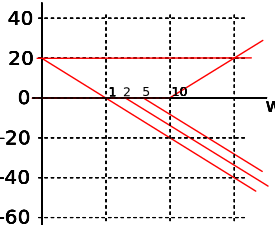

In [20]:
SVG(valid_path + 'bodef16.svg')

Adding point to point the five curves:

In [21]:
SVG(valid_path + 'bodef17.svg')

And Bode's magnitude graph is:

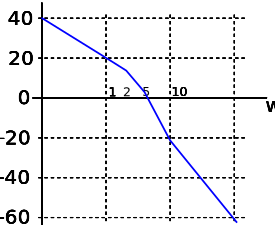

In [22]:
SVG(valid_path + 'bodef18.svg')

Whit Python:

In [23]:
import sympy
from sympy import *

sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

In [24]:
G = ((10)*(s+10))/((s)*(s+2)*(s+5))

In [25]:
G

In [26]:
G.expand()

In [27]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

s1 = signal.lti([10, 100], [1, 7, 10, 0]) # Creamos el sistema con los coeficientes de los polinomios
w, mag, phase = signal.bode(s1) # Diagrama de Bode: frecuencias, magnitud y fase

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.semilogx(w, mag, lw=5)    # Bode magnitude plot

plt.ylim([-60, 60])
plt.xlabel('Rad/s')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2,1,2)
plt.semilogx(w, phase, lw=5, label="real bode plot")  # Bode phase plot

plt.xlabel('Rad/s')
plt.ylim([-200, -80])
plt.ylabel('Phase (deg)')
plt.grid(True)
plt.show()

### Root locus plot

In [32]:
SVG(valid_path + 'rootl.svg')

In [33]:
import numpy as np
from matplotlib import pyplot as plt 
import control

G = control.TransferFunction((1, 1.5), (1, 11, 10, 0))

rlist, klist = control.rlocus(G)

plt.show()

### Data plot

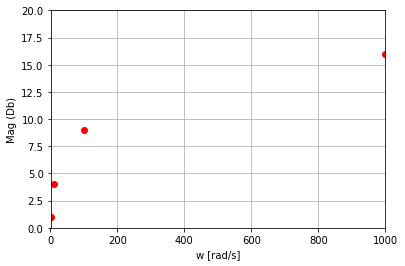

In [34]:
import matplotlib.pyplot as plt

plt.plot([1,10,100,1000], [1,4,9,16], 'ro')

plt.axis([1, 1000, 0, 20])
#plt.xscale('log') # Cambia escala del eje a logaritmica
plt.xlabel('w [rad/s]')
plt.ylabel('Mag (Db)')
plt.grid()
plt.show()